<a href="https://colab.research.google.com/github/TeoKets/Customer_Review_Analysis/blob/main/Customer_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necassary Libraries.

In [ ]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

#Reading Data from dataset

In [ ]:
df=pandas.read_csv("/content/Customer_Review (1).csv")
df.head()

,Serial Number,Age,Gender,Review,Education,Purchased
0,1,56,Male,Poor,PG,Yes
1,2,46,Female,Good,School,Yes
2,3,32,Female,Good,PG,No
3,4,25,Female,Average,PG,Yes
4,5,38,Male,Poor,UG,No


# Explorytary Data Analysis (EDA)

EDA is the process of examining and visualizing data to understand its main features, patterns, and relationships before applying models.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Serial Number  100 non-null    int64 
 1   Age            100 non-null    int64 
 2   Gender         100 non-null    object
 3   Review         100 non-null    object
 4   Education      100 non-null    object
 5   Purchased      100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [ ]:
number_of_rows=df.shape[0]
number_of_columns=df.shape[1]
column_names=df.columns
print(f"number of rows : {number_of_rows}")
print(f"number of columns : {number_of_columns}")
print(f"column names : {column_names}")

number of rows : 100
number of columns : 6
column names : Index(['Serial Number', 'Age', 'Gender', 'Review', 'Education', 'Purchased'], dtype='object')


The average person in our dataset is approximately 38 years old, while the minimum age is 18 and the maximum is 59.

In [ ]:
df.describe()

,Serial Number,Age
count,100.000000,100.000000
mean,50.500000,37.910000
std,29.011492,12.219454
min,1.000000,18.000000
25%,25.750000,26.750000
50%,50.500000,38.000000
75%,75.250000,46.250000
max,100.000000,59.000000


Our data is clean from duplicates and null values.

In [ ]:
null_number=df.isnull().sum()
dupli_number=df.duplicated().sum()
print(f"{null_number}")
print(f"the number of dupli values : {dupli_number}")

Serial Number    0
Age              0
Gender           0
Review           0
Education        0
Purchased        0
dtype: int64
the number of dupli values : 0


# Visualization

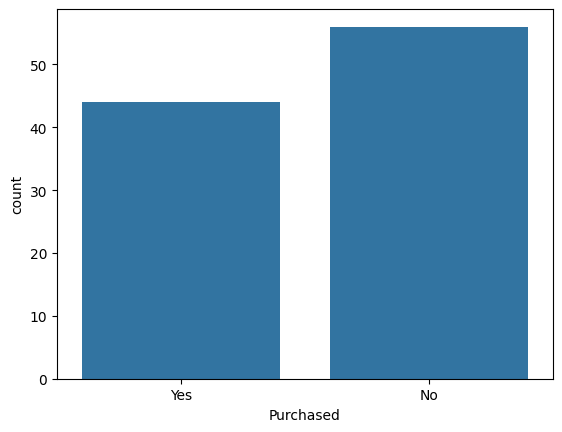

In [ ]:
sns.countplot(x=df.Purchased,data=df)
plt.show()

Although men may appear to make more purchases in absolute terms, it is important to consider the proportion of male and female visitors to the site. When adjusted for visit frequency, women demonstrate a higher purchase rate relative to their site visits.

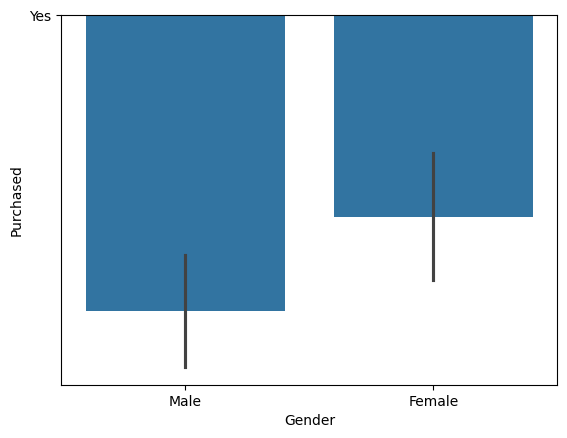

In [ ]:
sns.barplot(x=df.Gender,y=df.Purchased)
plt.show()

In [ ]:
males=df.loc[df.Gender=="Male"].count()
males=males.Age
males_yes=df.loc[(df.Gender=="Male") & (df.Purchased=="Yes")].count()
males_yes=males_yes.Age
females=df.loc[df.Gender=="Female"].count()
females=females.Age
females_yes=df.loc[(df.Gender=="Female") & (df.Purchased=="Yes")].count()
females_yes=females_yes.Age
print(f"number of males : {males}")
print(f"number of females : {females}")
prc_male_yes=round(males_yes/males*100)
prc_female_yes=round(females_yes/females*100)
print(f"percentage of males who purchased : {prc_male_yes}%")
print(f"percentage of females who purchased : {prc_female_yes}%")

number of males : 57
number of females : 43
percentage of males who purchased : 35%
percentage of females who purchased : 56%


The analysis indicates that female customers are more likely to complete a purchase once they visit the site compared to male customers. This suggests that women exhibit higher conversion rates, potentially reflecting greater purchase intent or responsiveness to the available offerings.

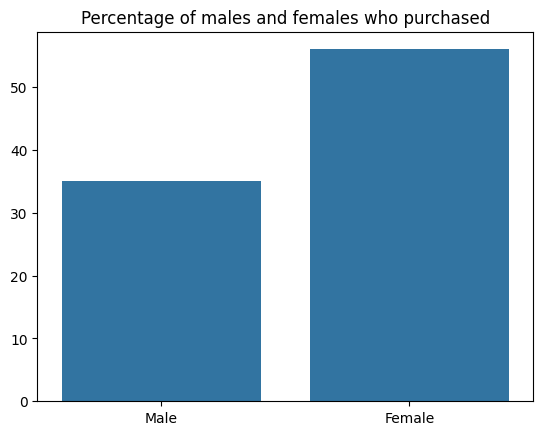

In [ ]:
sns.barplot(x=["Male","Female"],y=[prc_male_yes,prc_female_yes])
plt.title("Percentage of males and females who purchased")
plt.show()

The data suggests that as an individual’s education level increases, the likelihood of making a purchase tends to decrease. Regardless of education level, however, a larger proportion of individuals do not complete a purchase compared to those who do.

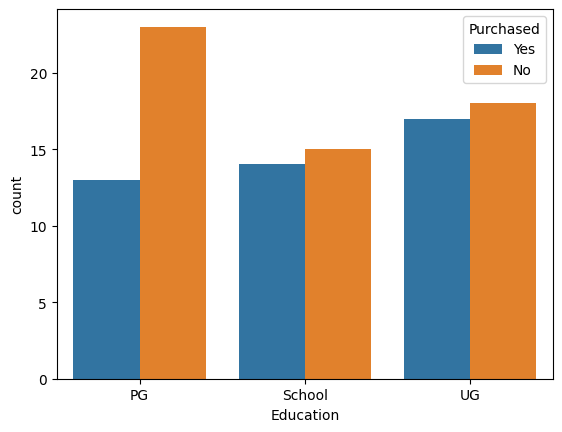

In [ ]:
sns.countplot(x=df.Education,hue=df.Purchased,data=df)
plt.show()

# Model Training Logistic Regression

In [191]:
df.Purchased.loc[df.Purchased=="Yes"]=1
df.Purchased.loc[df.Purchased=="No"]=0
df.Purchased=df.Purchased.astype("int")
df_dumies=pandas.get_dummies(df,columns=["Gender","Education","Review"],dtype="int")
df_dumies.head()
features=df_dumies.drop(["Serial Number",'Purchased'],axis=1)
target=df_dumies.Purchased
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=100)

/tmp/ipython-input-4055987950.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Purchased.loc[df.Purchased=="Yes"]=1
/tmp/ipython-input-4055987950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [ ]:
LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)
LogReg.score(X_test,y_test)
coef=LogReg.coef_
for column in features.columns:
  print(f"{column} : {coef[0][features.columns.get_loc(column)]}")

Age : 0.014075873250593321
Gender_Female : 0.34781749356159825
Gender_Male : -0.34781254799940897
Education_PG : -0.26317996277322336
Education_School : 0.30293195445554144
Education_UG : -0.039747046120141655
Review_Average : 0.07064137673516513
Review_Good : 0.14029145934618076
Review_Poor : -0.21092789051915442


Based on the model’s coefficients, gender emerges as the most influential factor affecting purchase decisions.


# Model Training Random Forest with XGBoost

In [ ]:
xgboost=XGBClassifier(n_estimators=150,random_state=60,learning_rate=0.002)
xgboost.fit(X_train,y_train)
xgboost.score(X_test,y_test)

0.75